In [1]:
!pip install sentence-transformers scikit-learn pandas numpy scipy

  Using cached tqdm-4.67.3-py3-none-any.whl.metadata (57 kB)
  Using cached tokenizers-0.22.2-cp39-abi3-win_amd64.whl.metadata (7.4 kB)
  Using cached safetensors-0.7.0-cp38-abi3-win_amd64.whl.metadata (4.2 kB)
  Using cached fsspec-2026.2.0-py3-none-any.whl.metadata (10 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached annotated_doc-0.0.4-py3-none-any.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.4 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/10.4 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------

In [3]:
import os

resume_texts = []
base_path = r"C:\Users\srism\Downloads\archive\data\data\INFORMATION-TECHNOLOGY"

for file in os.listdir(base_path):
    if file.endswith(".txt"):
        with open(os.path.join(base_path, file), "r", encoding="utf-8", errors="ignore") as f:
            resume_texts.append(f.read())

print("Total resumes loaded:", len(resume_texts))

Total resumes loaded: 0


In [4]:
import os

base_path = r"C:\Users\srism\Downloads\archive\data\data\INFORMATION-TECHNOLOGY"

print(os.listdir(base_path))

['10089434.pdf', '10247517.pdf', '10265057.pdf', '10553553.pdf', '10641230.pdf', '10839851.pdf', '10840430.pdf', '11580408.pdf', '11584809.pdf', '11957080.pdf', '12045067.pdf', '12334140.pdf', '12635195.pdf', '12763627.pdf', '13385306.pdf', '13405733.pdf', '13477922.pdf', '13836471.pdf', '14789139.pdf', '15118506.pdf', '15297298.pdf', '15651486.pdf', '15791766.pdf', '15802627.pdf', '16186411.pdf', '16533554.pdf', '16899268.pdf', '17111768.pdf', '17641670.pdf', '17681064.pdf', '17688766.pdf', '17987433.pdf', '18067556.pdf', '18159866.pdf', '18176523.pdf', '18187364.pdf', '18301617.pdf', '18752129.pdf', '19201175.pdf', '19796840.pdf', '19850482.pdf', '20001721.pdf', '20024870.pdf', '20237244.pdf', '20408458.pdf', '20674668.pdf', '20824105.pdf', '20879311.pdf', '21283365.pdf', '21780877.pdf', '22450718.pdf', '22776912.pdf', '23527321.pdf', '23666211.pdf', '23864648.pdf', '24020470.pdf', '24038620.pdf', '24083609.pdf', '24230851.pdf', '24889109.pdf', '24913648.pdf', '25207620.pdf', '258573

In [5]:
print(os.listdir(base_path))

['10089434.pdf', '10247517.pdf', '10265057.pdf', '10553553.pdf', '10641230.pdf', '10839851.pdf', '10840430.pdf', '11580408.pdf', '11584809.pdf', '11957080.pdf', '12045067.pdf', '12334140.pdf', '12635195.pdf', '12763627.pdf', '13385306.pdf', '13405733.pdf', '13477922.pdf', '13836471.pdf', '14789139.pdf', '15118506.pdf', '15297298.pdf', '15651486.pdf', '15791766.pdf', '15802627.pdf', '16186411.pdf', '16533554.pdf', '16899268.pdf', '17111768.pdf', '17641670.pdf', '17681064.pdf', '17688766.pdf', '17987433.pdf', '18067556.pdf', '18159866.pdf', '18176523.pdf', '18187364.pdf', '18301617.pdf', '18752129.pdf', '19201175.pdf', '19796840.pdf', '19850482.pdf', '20001721.pdf', '20024870.pdf', '20237244.pdf', '20408458.pdf', '20674668.pdf', '20824105.pdf', '20879311.pdf', '21283365.pdf', '21780877.pdf', '22450718.pdf', '22776912.pdf', '23527321.pdf', '23666211.pdf', '23864648.pdf', '24020470.pdf', '24038620.pdf', '24083609.pdf', '24230851.pdf', '24889109.pdf', '24913648.pdf', '25207620.pdf', '258573

In [6]:
!pip install PyPDF2

In [7]:
import os
import PyPDF2

base_path = r"C:\Users\srism\Downloads\archive\data\data\INFORMATION-TECHNOLOGY"

resume_texts = []

for file in os.listdir(base_path):
    if file.endswith(".pdf"):
        with open(os.path.join(base_path, file), "rb") as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                text += page.extract_text() if page.extract_text() else ""
            resume_texts.append(text)

print("Total resumes loaded:", len(resume_texts))

Total resumes loaded: 120


In [9]:
job_texts = []

for i in range(60):
    job_texts.append("""
    We are hiring a Software Engineer with experience in Python, SQL,
    machine learning, REST APIs, and cloud platforms.
    Responsibilities include model deployment, data analysis,
    and system optimization.
    """)

In [10]:
# Make equal length
min_length = min(len(resume_texts), len(job_texts))

resume_texts = resume_texts[:min_length]
job_texts = job_texts[:min_length]

print("Final paired samples:", min_length)

Final paired samples: 60


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

baseline_scores = []
vectorizer = TfidfVectorizer(stop_words='english')

for i in range(len(resume_texts)):
    texts = [resume_texts[i], job_texts[i]]
    tfidf_matrix = vectorizer.fit_transform(texts)
    score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    baseline_scores.append(score)

baseline_mean = np.mean(baseline_scores)
baseline_std = np.std(baseline_scores)

print("Baseline Mean:", baseline_mean)
print("Baseline Std:", baseline_std)

Baseline Mean: 0.045380288116102174
Baseline Std: 0.02573695696592227


In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

llm_scores = []

for i in range(len(resume_texts)):
    resume_embedding = model.encode(resume_texts[i])
    job_embedding = model.encode(job_texts[i])
    score = cosine_similarity([resume_embedding], [job_embedding])[0][0]
    llm_scores.append(score)

llm_mean = np.mean(llm_scores)
llm_std = np.std(llm_scores)

print("LLM Mean:", llm_mean)
print("LLM Std:", llm_std)

C:\Users\srism\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|█████████████████████| 103/103 [00:00<00:00, 332.27it/s, Materializing param=pooler.dense.weight]
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


LLM Mean: 0.37814343
LLM Std: 0.077001214


In [13]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(llm_scores, baseline_scores)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 34.95529764962191
p-value: 3.919924449011923e-41


In [15]:
import random

job_templates = [

"""
We are hiring a Data Scientist with experience in Python, SQL, machine learning, 
data preprocessing, and model evaluation. The candidate should have knowledge of 
scikit-learn, pandas, and statistical analysis. Responsibilities include building 
predictive models, analyzing datasets, and deploying ML solutions.
""",

"""
We are looking for a Machine Learning Engineer skilled in deep learning, PyTorch, 
TensorFlow, model deployment, and API integration. Experience with cloud platforms 
(AWS/GCP) and MLOps practices is preferred. Responsibilities include designing, 
training, and optimizing scalable ML systems.
""",

"""
We are seeking a Software Engineer with strong programming skills in Python, Java, 
REST APIs, database systems, and system design. The role involves backend development, 
code optimization, and collaboration with cross-functional teams.
""",

"""
We are hiring a Data Analyst proficient in SQL, Excel, Power BI, and data visualization. 
The candidate should be able to interpret complex datasets, generate reports, and 
communicate insights effectively to stakeholders.
"""
]

job_texts = [random.choice(job_templates) for _ in range(len(resume_texts))]

print("Total diversified job descriptions:", len(job_texts))

Total diversified job descriptions: 60


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

baseline_scores = []
vectorizer = TfidfVectorizer(stop_words='english')

for i in range(len(resume_texts)):
    texts = [resume_texts[i], job_texts[i]]
    tfidf_matrix = vectorizer.fit_transform(texts)
    score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    baseline_scores.append(score)

baseline_mean = np.mean(baseline_scores)
baseline_std = np.std(baseline_scores)

print("Baseline Mean:", baseline_mean)
print("Baseline Std:", baseline_std)

Baseline Mean: 0.036153886519831056
Baseline Std: 0.024944761244274617


In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

llm_scores = []

for i in range(len(resume_texts)):
    resume_embedding = model.encode(resume_texts[i])
    job_embedding = model.encode(job_texts[i])
    score = cosine_similarity([resume_embedding], [job_embedding])[0][0]
    llm_scores.append(score)

llm_mean = np.mean(llm_scores)
llm_std = np.std(llm_scores)

print("LLM Mean:", llm_mean)
print("LLM Std:", llm_std)

Loading weights: 100%|█████████████████████| 103/103 [00:00<00:00, 891.49it/s, Materializing param=pooler.dense.weight]
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


LLM Mean: 0.31434542
LLM Std: 0.077538244


In [18]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(llm_scores, baseline_scores)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 28.974839666038438
p-value: 1.379381890054093e-36


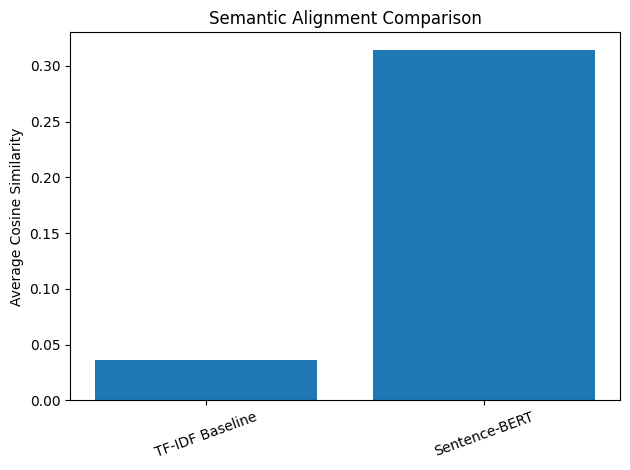

In [19]:
import matplotlib.pyplot as plt

labels = ['TF-IDF Baseline', 'Sentence-BERT']
means = [baseline_mean, llm_mean]

plt.figure()
plt.bar(labels, means)
plt.ylabel('Average Cosine Similarity')
plt.title('Semantic Alignment Comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

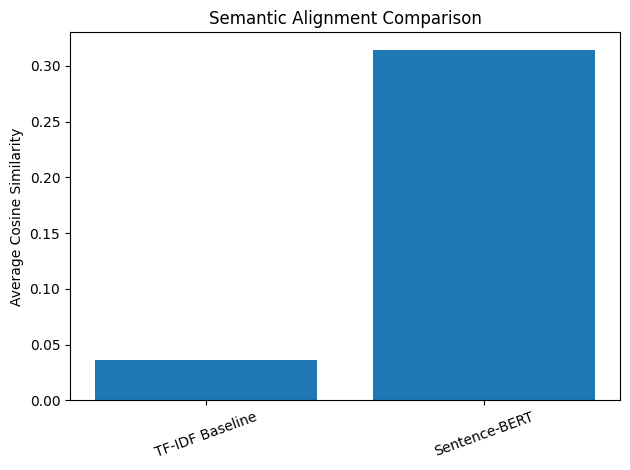

In [20]:
plt.figure()
plt.bar(labels, means)
plt.ylabel('Average Cosine Similarity')
plt.title('Semantic Alignment Comparison')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("semantic_alignment_comparison.png")
plt.show()